<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Direction_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:28:45 Starting...
14:28:45 Installing yfinance into Google notebook...
14:28:56 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


14:29:09 Initialized.


In [2]:
from requests import get
from io import StringIO
ds=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/direction.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker"}).set_index('Ticker')
ds["Significance"]=ds["Significance"].apply(lambda x:'' if isinstance(x,float) else x)
nprint("Loaded direction statistics data.")
display(ds)

14:29:10 Loaded direction statistics data.


,Up,Down,Sample,Up:Down Ratio,Loss Percent,Loss Days,Z Score,p Value,Significance
Ticker,,,,,,,,,
Total,155,109,265,1.422018,41.132075,2.056604,2.831104,0.004639,**
UUP,71,50,246,1.420000,20.325203,1.016260,1.909091,0.056250,
QQQ,147,117,264,1.256410,44.318182,2.215909,1.846372,0.064838,
TBX,38,25,201,1.520000,12.437811,0.621891,1.637846,0.101454,
DIA,143,118,264,1.211864,44.696970,2.234848,1.547461,0.121752,
TQQQ,122,99,264,1.232323,37.500000,1.875000,1.547147,0.121828,
TBT,29,19,264,1.526316,7.196970,0.359848,1.443376,0.148915,
SH,1,4,264,0.250000,1.515152,0.075758,-1.341641,0.179712,
UDOW,141,123,264,1.146341,46.590909,2.329545,1.107823,0.267938,


In [3]:
from scipy.stats import norm
SPX=download('^GSPC','2023-01-26')
SPX['Daily Return']=SPX['Adj Close']/SPX['Adj Close'].shift()*hundred-hundred
SPX['Up']=SPX['Daily Return'].apply(lambda x:one if x>zero else zero if x<=zero else np.nan)
SPX['Down']=SPX['Daily Return'].apply(lambda x:one if x<zero else zero if x>=zero else np.nan)
display(SPX)
ds.loc['Market','Up']=SPX['Up'].sum()
ds.loc['Market','Down']=SPX['Down'].sum()
ds.loc['Market','Sample']=SPX['Daily Return'].count()
ds.loc['Market','Up:Down Ratio']=ds.loc['Market','Up']/ds.loc['Market','Down']
ds.loc['Market','Loss Percent']=ds.loc['Market','Down']/ds.loc['Market','Sample']*hundred
ds.loc['Market','Loss Days']=ds.loc['Market','Loss Percent']*five/hundred
ds.loc['Market','Z Score']=(ds.loc['Market','Up']-ds.loc['Market','Down'])/np.sqrt(ds.loc['Market','Up']+ds.loc['Market','Down'])
ds.loc['Market','p Value']=norm.sf(ds.loc['Market','Z Score'])
ds.loc['Market','Significance']='***' if ds.loc['Market','p Value']<0.001 else '**' if ds.loc['Market','p Value']<0.01 else '*' if ds.loc['Market','p Value']<0.05 else ''
display(ds)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Up,Down
Date,,,,,,,,,
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3809590000,NaN,NaN,NaN
2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,4070.560059,3907760000,0.249484,1.0,0.0
2023-01-30,4049.270020,4063.850098,4015.550049,4017.770020,4017.770020,3802000000,-1.296874,0.0,1.0
2023-01-31,4020.850098,4077.159912,4020.439941,4076.600098,4076.600098,4679320000,1.464247,1.0,0.0
2023-02-01,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000,1.045230,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000,0.057058,1.0,0.0
2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000,0.574234,1.0,0.0
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000,-0.094895,0.0,1.0


,Up,Down,Sample,Up:Down Ratio,Loss Percent,Loss Days,Z Score,p Value,Significance
Ticker,,,,,,,,,
Total,155.0,109.0,265.0,1.422018,41.132075,2.056604,2.831104,0.004639,**
UUP,71.0,50.0,246.0,1.420000,20.325203,1.016260,1.909091,0.056250,
QQQ,147.0,117.0,264.0,1.256410,44.318182,2.215909,1.846372,0.064838,
TBX,38.0,25.0,201.0,1.520000,12.437811,0.621891,1.637846,0.101454,
DIA,143.0,118.0,264.0,1.211864,44.696970,2.234848,1.547461,0.121752,
TQQQ,122.0,99.0,264.0,1.232323,37.500000,1.875000,1.547147,0.121828,
TBT,29.0,19.0,264.0,1.526316,7.196970,0.359848,1.443376,0.148915,
SH,1.0,4.0,264.0,0.250000,1.515152,0.075758,-1.341641,0.179712,
UDOW,141.0,123.0,264.0,1.146341,46.590909,2.329545,1.107823,0.267938,


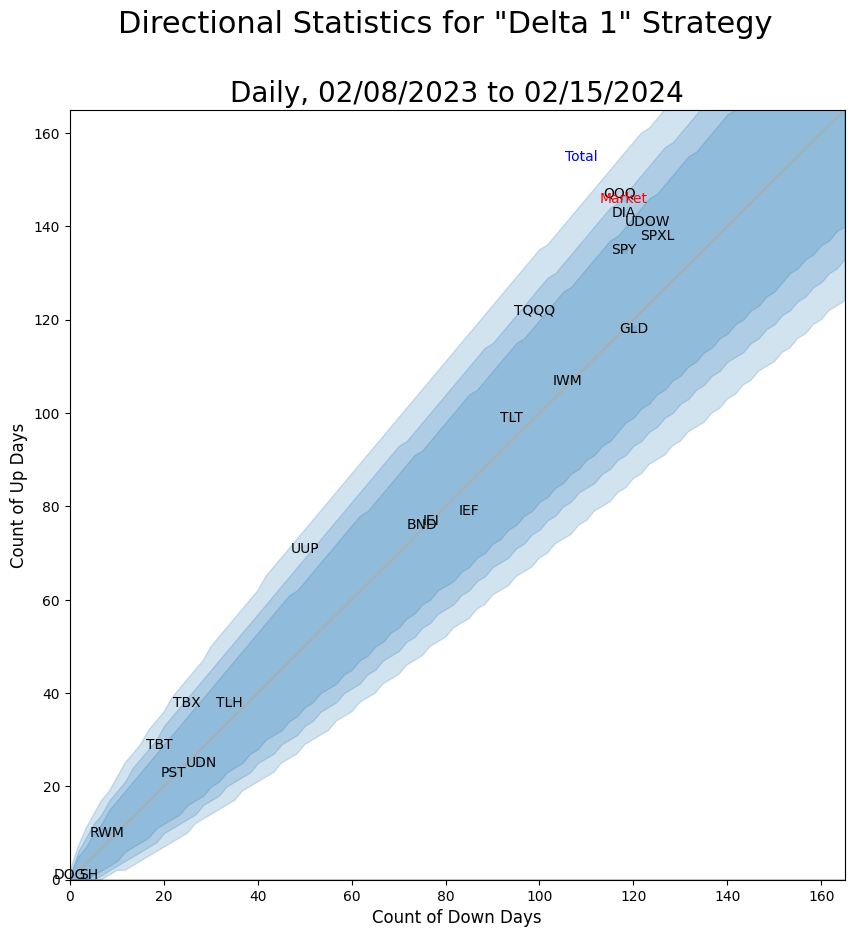

In [9]:
from scipy.stats import poisson
from datetime import timedelta

figure,plot=pl.subplots(figsize=(ten,ten))
ds.plot.scatter("Down","Up",ax=plot,alpha=0.1)

for ticker in [t for t in ds.index if t not in ('Total','Market')]:
    plot.text(ds.loc[ticker,"Down"],ds.loc[ticker,"Up"],ticker,ha='center',va='center',color='black')

plot.text(ds.loc["Total","Down"],ds.loc["Total","Up"],"Total",ha='center',va='center',color='blue')
plot.text(ds.loc["Market","Down"],ds.loc["Market","Up"],"Market",ha='center',va='center',color='red')

mn,mx=ds[["Up","Down"]].min().min(),ds[["Up","Down"]].max().max()
x=np.linspace(mn+one/ten,mx+10,100)
y=x*one #ds.loc["Market","Up:Down Ratio"]
plot.plot(x,x,'-',alpha=0.2,color='C1',label='No Directional Bias')
#plot.plot(x,y,'-',alpha=0.2,color='C0',label='Market Directional Bias')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.set_xlim(zero,x[-1])
plot.set_ylim(zero,x[-1])
plot.set_xlabel("Count of %s Days" % plot.get_xlabel(),fontsize=12)
plot.set_ylabel("Count of %s Days" % plot.get_ylabel(),fontsize=12)
title='Directional Statistics for "Delta 1" Strategy'
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % ((datetime.now()-timedelta(7e0/5e0*float(ds['Sample'].max()+1))).strftime(DATE_FORMAT),
    datetime.now().strftime(DATE_FORMAT)),fontsize=20)

for pvalue in 0.05,0.01,0.001:
    yp,ym=poisson.ppf(pvalue/two,y),poisson.ppf(one-pvalue/two,y)
    plot.fill_between(x,ym,yp,color='C0',alpha=0.2,label="%g %% C.R." % (hundred-pvalue*hundred))

figure.savefig(title+".png",dpi=300,bbox_inches='tight')